1.
Напишите текстом как минимум 6 функций распределения и соответствующие им функции правдоподобия.
Напишите, какие по вашему мнению целевые переменные из бизнеса (лучше - из страхового) соответствуют этим распределениям (по 2 примера на каждое).
Пример: биномиальное распределение для задачи моделирования пролонгации (продлил клиент полис на следующий период или нет).

1. Распределение Пуассона - число дорожно – транспортных происшествий с данным видом автотранспорта в течении года.
2. Геометрическое распределение - количество испытаний до наступления успеха.
3. Экспоненциальное распределение - время обслуживания клиента.
4. Нормальное распределение - отклонение размеров детали при производстве.
5. Гамма распределение - длительности жизни электрических ламп.
6. Распределение Парето - контроль качества производства.

2.
На основе датасета из ноутбука проведите анализ данных и постройте зависимости частоты и среднего убытка от какого-либо параметра (за исключением уже выполненных в ноутбуке).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/freMPL-R.csv', low_memory=False)

In [3]:
df = df.loc[df.Dataset.isin([5, 6, 7, 8, 9])].drop(['Dataset'], axis=1).dropna(axis=1, how='all').drop_duplicates()

In [4]:
df[df['ClaimAmount']>0].head(10)

,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,ClaimAmount,ClaimInd,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea
145813,0.617,602,2004-05-19,NaN,Male,Other,CSP60,Private,68,0,50,5377.204532,1,1.0,0.0,1.0,0.0,1.0,0.0,4.0
145814,0.761,357,2004-01-01,2004-10-05,Female,Alone,CSP55,Private+trip to office,47,0,50,2017.843505,1,0.0,1.0,0.0,0.0,0.0,0.0,6.0
145833,0.023,271,2004-10-23,2004-11-01,Male,Other,CSP50,Private+trip to office,49,0,50,356.773414,1,0.0,1.0,0.0,0.0,0.0,2.0,8.0
145845,0.833,539,2004-01-01,2004-11-01,Male,Other,CSP60,Private,75,0,50,645.125982,1,0.0,0.0,0.0,0.0,0.0,0.0,9.0
145846,0.957,302,2004-01-01,2004-12-16,Female,Other,CSP55,Private+trip to office,49,0,54,1200.422356,1,0.0,0.0,0.0,0.0,1.0,0.0,8.0
145850,0.611,525,2004-05-21,NaN,Male,Other,CSP60,Private,68,1,50,4326.525680,1,0.0,0.0,0.0,0.0,0.0,0.0,10.0
145863,0.482,343,2004-01-01,2004-06-25,Female,Other,CSP1,Professional,48,0,64,2667.093353,1,0.0,0.0,1.0,0.0,1.0,0.0,9.0
145866,0.998,276,2004-01-01,2004-12-31,Male,Other,CSP46,Professional,41,0,60,386.712689,1,0.0,0.0,0.0,0.0,0.0,0.0,6.0
145883,0.097,446,2004-01-01,2004-02-06,Male,Alone,CSP48,Professional,57,0,50,2020.635952,1,0.0,1.0,0.0,0.0,0.0,0.0,11.0
145899,0.816,586,2004-03-07,NaN,Male,Other,CSP60,Private,71,0,50,467.729003,1,0.0,0.0,1.0,0.0,0.0,0.0,7.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115155 entries, 145780 to 310979
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Exposure           115155 non-null  float64
 1   LicAge             115155 non-null  int64  
 2   RecordBeg          115155 non-null  object 
 3   RecordEnd          59455 non-null   object 
 4   Gender             115155 non-null  object 
 5   MariStat           115155 non-null  object 
 6   SocioCateg         115155 non-null  object 
 7   VehUsage           115155 non-null  object 
 8   DrivAge            115155 non-null  int64  
 9   HasKmLimit         115155 non-null  int64  
 10  BonusMalus         115155 non-null  int64  
 11  ClaimAmount        115155 non-null  float64
 12  ClaimInd           115155 non-null  int64  
 13  ClaimNbResp        115155 non-null  float64
 14  ClaimNbNonResp     115155 non-null  float64
 15  ClaimNbParking     115155 non-null  float64
 1

In [6]:
df['PolicyCount'] = 1
df['ClaimCount'] = df['ClaimAmount'] > 0
df['NoClaimCount'] = df.PolicyCount - df.ClaimCount

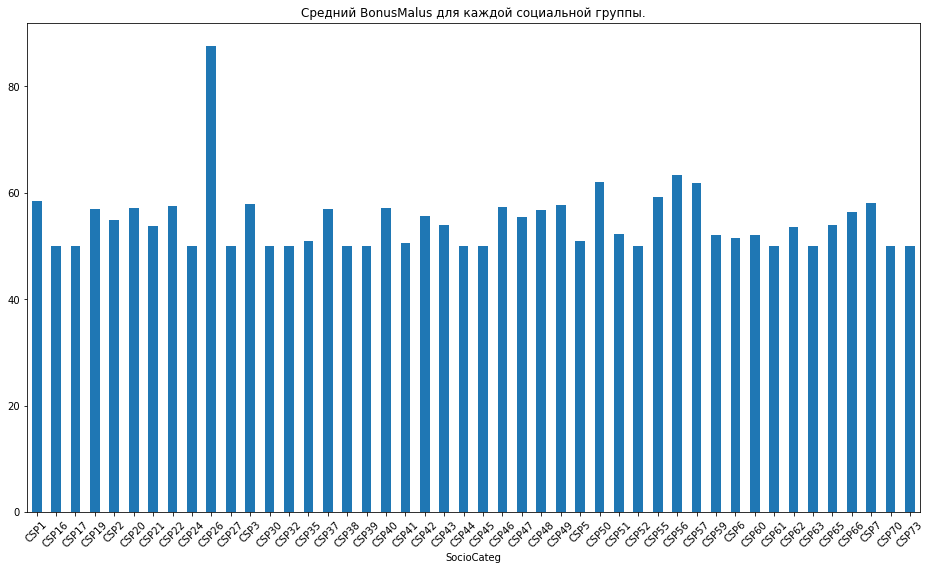

In [7]:
df.groupby('SocioCateg')['BonusMalus'].mean().plot(kind='bar', figsize=(16, 9))
plt.title('Средний BonusMalus для каждой социальной группы.')
plt.xticks(rotation=45)
plt.show()

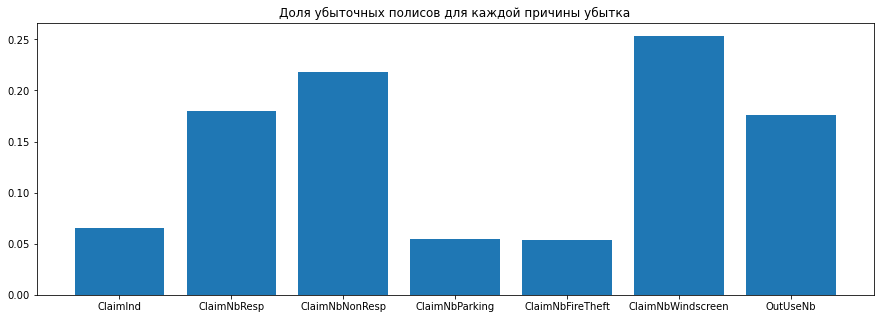

In [8]:
claim_reason = ['ClaimInd','ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 
                'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb']
sum_claim = {reason:df[reason].sum()/df[claim_reason].sum().sum() for reason in claim_reason}

plt.figure(figsize=(15, 5))
plt.bar(sum_claim.keys(), sum_claim.values())
plt.title('Доля убыточных полисов для каждой причины убытка')
plt.show()

In [9]:
df_group_Malus = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df['BonusMalus']).sum()
df_group_Malus = df_group_Malus.reset_index()
df_group_Malus['Freq'] = df_group_Malus.ClaimCount / df_group_Malus.Exposure
df_group_Malus['AvgClaim'] = df_group_Malus.ClaimAmount / df_group_Malus.ClaimCount

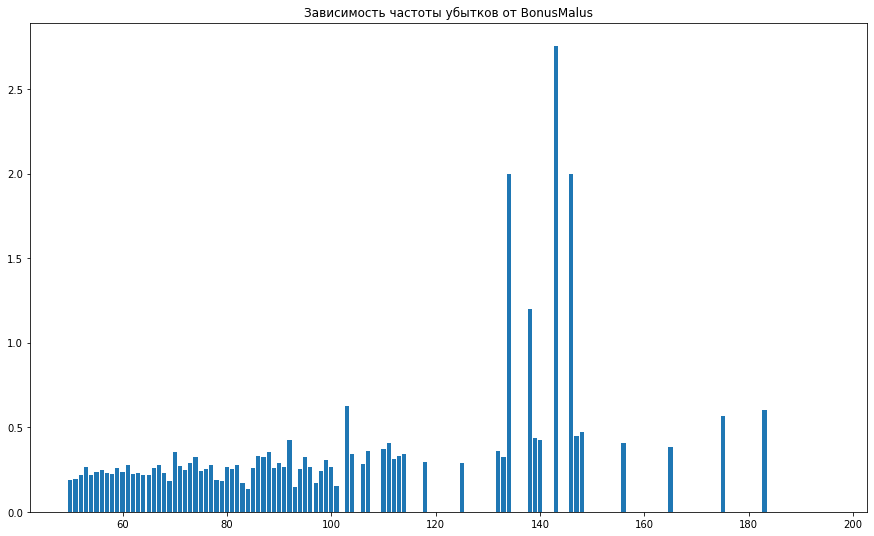

In [10]:
plt.figure(figsize=(15, 9))
plt.bar(df_group_Malus['BonusMalus'], df_group_Malus['Freq'])
plt.title('Зависимость частоты убытков от BonusMalus')
plt.show()

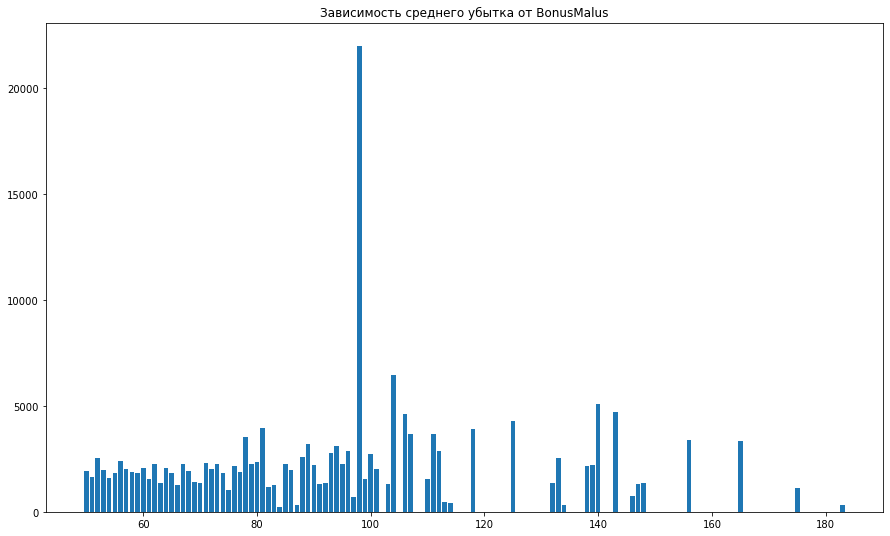

In [11]:
plt.figure(figsize=(15, 9))
plt.bar(df_group_Malus['BonusMalus'], df_group_Malus['AvgClaim'])
plt.title('Зависимость среднего убытка от BonusMalus')
plt.show()